In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

In [3]:
# check GPU
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
# preprocessing

# hyperparameter
batch_size = 64

# transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
    ])

In [5]:
# data loading
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

In [6]:
# Access a sample from the dataset
image, label = train_dataset[0]

# Display the image and label
print("Label:", label)
display(image)

Label: 5


tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

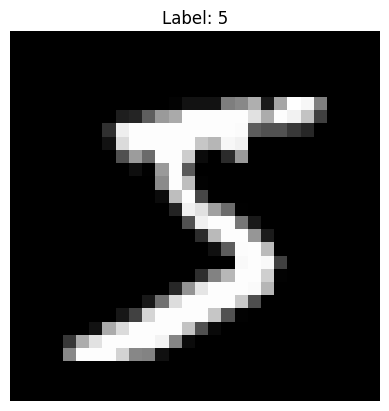

In [7]:
# image visualization
import matplotlib.pyplot as plt
import numpy as np

# Access a sample from the dataset
image, label = train_dataset[0]

# The image tensor is normalized, so we need to denormalize it for display
# The normalization was: transforms.Normalize((0.5), (0.5))
# Denormalization: image * std + mean
denormalized_image = image * 0.5 + 0.5

# Convert the tensor to a NumPy array and remove the channel dimension for grayscale image
image_np = denormalized_image.squeeze().numpy()

# Display the image using Matplotlib
plt.imshow(image_np, cmap='gray')
plt.title(f'Label: {label}')
plt.axis('off') # Hide axes
plt.show()

In [8]:
# Creating DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [9]:
# defining the CNN code

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)

    self.fc1 = nn.Linear(32*7*7, 10)

  def forward(self, x):
    x = self.pool(nn.functional.relu(self.conv1(x)))
    x = self.pool(nn.functional.relu(self.conv2(x)))
    # flatten the image
    x = x.view(-1, 32*7*7)
    x = self.fc1(x)
    return x

# moving model to GPU
model = CNN().to(device)

In [10]:
# workflow visualization
from torchviz import make_dot
import torch

model = CNN()
x = torch.randn(1, 1, 28, 28)  # Dummy input
y = model(x)
dot = make_dot(y, params=dict(model.named_parameters()))
dot.render("cnn_model", format="png")  # Saves as PNG

'cnn_model.png'

In [11]:
# parameters
learning_rate = 0.001
epochs = 5

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [12]:
# training the model, trianing loop
n_total_steps = len(train_loader)

# Ensure the model is on the correct device
model.to(device)

for epoch in range(epochs):
  for i, (images, labels) in enumerate(train_loader):
    # moving to gpu
    images = images.to(device)
    labels = labels.to(device)

    # forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print (f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [100/938], Loss: 0.3038
Epoch [1/5], Step [200/938], Loss: 0.2056
Epoch [1/5], Step [300/938], Loss: 0.1405
Epoch [1/5], Step [400/938], Loss: 0.0845
Epoch [1/5], Step [500/938], Loss: 0.0651
Epoch [1/5], Step [600/938], Loss: 0.1211
Epoch [1/5], Step [700/938], Loss: 0.0350
Epoch [1/5], Step [800/938], Loss: 0.0834
Epoch [1/5], Step [900/938], Loss: 0.0572
Epoch [2/5], Step [100/938], Loss: 0.0244
Epoch [2/5], Step [200/938], Loss: 0.2844
Epoch [2/5], Step [300/938], Loss: 0.0068
Epoch [2/5], Step [400/938], Loss: 0.0888
Epoch [2/5], Step [500/938], Loss: 0.0641
Epoch [2/5], Step [600/938], Loss: 0.0959
Epoch [2/5], Step [700/938], Loss: 0.0175
Epoch [2/5], Step [800/938], Loss: 0.0031
Epoch [2/5], Step [900/938], Loss: 0.0546
Epoch [3/5], Step [100/938], Loss: 0.0283
Epoch [3/5], Step [200/938], Loss: 0.0083
Epoch [3/5], Step [300/938], Loss: 0.0413
Epoch [3/5], Step [400/938], Loss: 0.0226
Epoch [3/5], Step [500/938], Loss: 0.0046
Epoch [3/5], Step [600/938], Loss:

In [13]:
model.eval()

CNN(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=1568, out_features=10, bias=True)
)

In [16]:
# evaluation
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader: # Corrected 'loders' to 'labels'
    images = images.to(device)
    labels = labels.to(device) # Move labels to the same device as images and model
    output = model(images)

    _, predicted = torch.max(output.data,1)
    n_samples = n_samples + labels.size(0)
    n_correct += (predicted == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'Accuracy of the network on the 10000 test images: {acc:.2f} %')

Accuracy of the network on the 10000 test images: 99.07 %
